# LPHYS1303 Simulation Numérique pour la Physique : Projet 1 - Soliton
--- 
## Auteurs : Augustin Basilavechia, Amaury Laridon
---


## Question 1 et 2 : Schéma Upwind et de Zabusky-Krustal

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, pi ,exp, cos, sin
from scipy.stats import hypsecant

### Stabilité du schéma Upwind : Calcul de $|\kappa|^2$

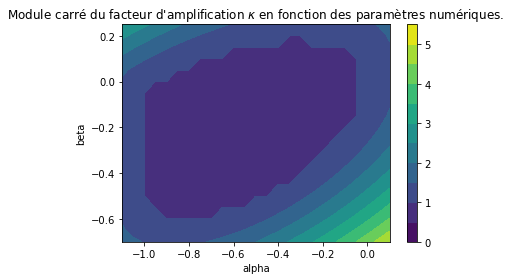

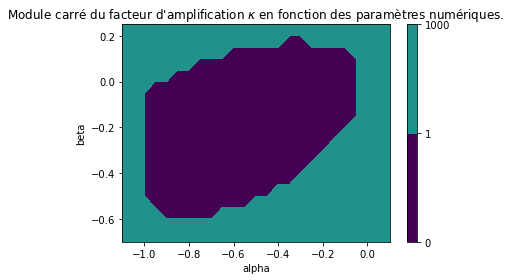

In [2]:
def k(alpha, beta):
    """Calcul du facteur d'amplifcation du schéma Upwind"""
    rh = np.arange(0,4*pi, 0.05)
    kap = [(1+2*alpha*(sin(x/2)**2))**2 + (sin(x)**2)*(alpha - 4*beta*(sin(x/2)**2))**2 for x in rh]
    return max(kap)

al = np.arange(-1.1,0.1, 0.05) #Paramètres numériques alpha
be = np.arange(-0.7,0.3, 0.05) #Paramètre numériques beta

kappa = [[k(a,b) for a in al] for b in be]

[aa,bb]=np.meshgrid(al,be)
levels = np.arange(0,6,0.5)
plt.contourf(aa,bb, np.array(kappa), levels)
plt.title('Module carré du facteur d\'amplification $\kappa$ en fonction des paramètres numériques.')
plt.xlabel("alpha")
plt.ylabel("beta")
plt.colorbar()
plt.show()

for i,ka in enumerate(kappa) :
    for j,k in enumerate(ka):
        if k > 1:
            kappa[i][j] = 1000
        else:
            kappa[i][j] = 0

levels = [0,1,1000] #Échelle choisie de telle sorte qu'elle met en avant le domaine de stabilité.
plt.contourf(aa,bb, np.array(kappa), levels)
plt.title('Module carré du facteur d\'amplification $\kappa$ en fonction des paramètres numériques.')
plt.xlabel("alpha")
plt.ylabel("beta")
plt.colorbar()
plt.show()


Résolution numérique avec une grille spatiale de 199 points
Résolution numérique avec une grille temporelle de 129999 points
Paramètres numérique : L = 2, T = 1.3s, h = 0.0100, k = 0.0000, delta = 0.0220, alpha = 0.0010, beta= 0.0024


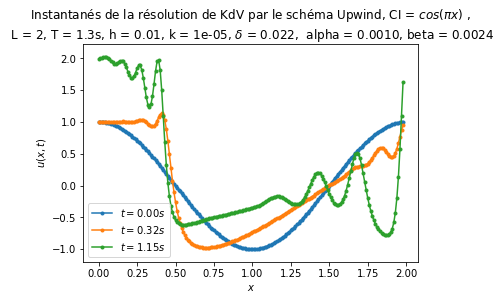

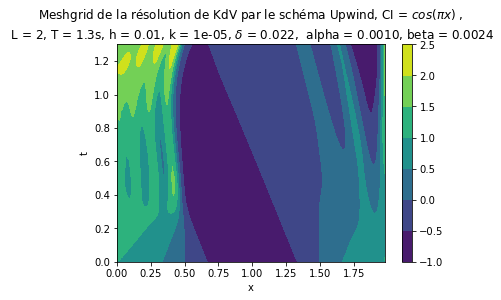

Résolution numérique avec une grille spatiale de 115 points
Résolution numérique avec une grille temporelle de 20099 points
Paramètres numérique : L = 20, T = 2.01s, h = 0.1739, k = 0.0001, delta = 0.0220, alpha = 0.0003, beta= 0.0000


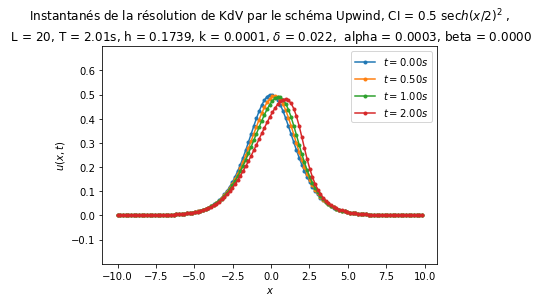

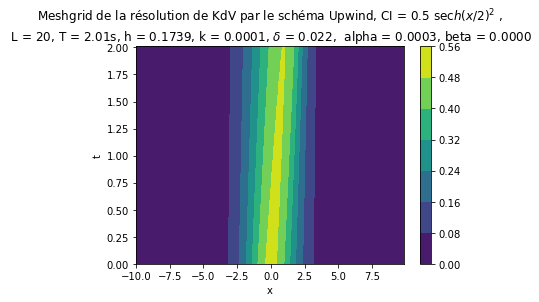

Résolution numérique avec une grille spatiale de 199 points
Résolution numérique avec une grille temporelle de 129999 points
Paramètres numérique : L = 2, T = 1.3s, h = 0.0100, k = 0.0000, delta = 0.0220, alpha = 0.0010, beta= 0.0024


<ipython-input-3-80ebecffb86d>:65: RuntimeWarning: overflow encountered in double_scalars
  U.append([u2[i] - (k/(3*h)) *(u1[i+1] + u1[i] + u1[i-1]) * (u1[i+1] - u1[i-1]) - (delta**2) * (k/(h**3)) * (u1[i+2] - 2*u1[i+1] + 2*u1[i-1] - u1[i-2])  for i in range(len(U[-1]))])
<ipython-input-3-80ebecffb86d>:65: RuntimeWarning: invalid value encountered in double_scalars
  U.append([u2[i] - (k/(3*h)) *(u1[i+1] + u1[i] + u1[i-1]) * (u1[i+1] - u1[i-1]) - (delta**2) * (k/(h**3)) * (u1[i+2] - 2*u1[i+1] + 2*u1[i-1] - u1[i-2])  for i in range(len(U[-1]))])


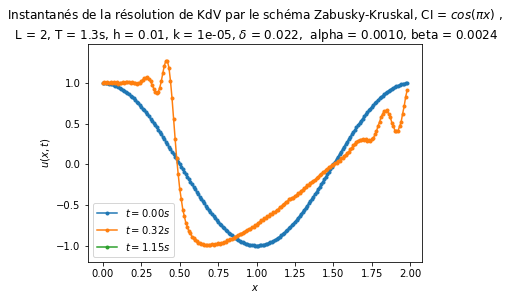

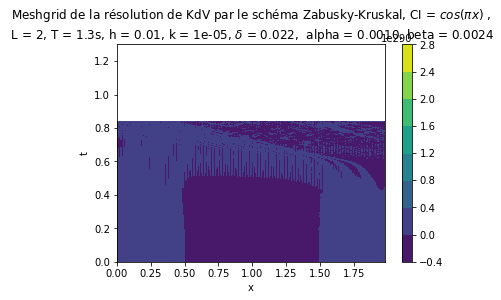

Résolution numérique avec une grille spatiale de 115 points
Résolution numérique avec une grille temporelle de 20099 points
Paramètres numérique : L = 20, T = 2.01s, h = 0.1739, k = 0.0001, delta = 0.0220, alpha = 0.0003, beta= 0.0000


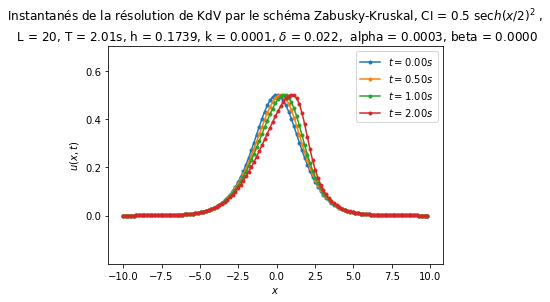

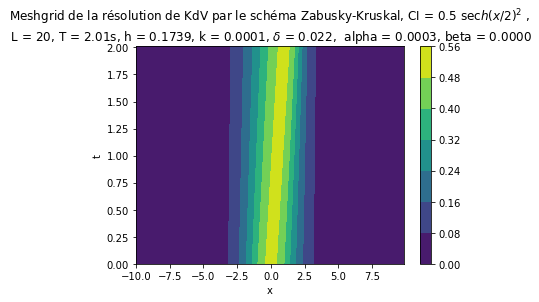

In [3]:
def f_cos(x):
    """Condition initiale de cos(\pi x)"""
    return np.cos(np.pi*x)

def f_sech(x):
    """Condition initiale de sech^2"""
    return 0.5*(pi*hypsecant.pdf(x/2))**2



def Upwind_KdV(u_0, delta, x_L, x_R, h, k, T):
    """Implémentation du schéma Upwind pour la résolution de l'équation de KdV"""
    x_grid = np.arange(x_L, x_R - h, h)
    print("Résolution numérique avec une grille spatiale de {} points".format(len(x_grid)))
    t_grid = np.arange(0, T-k, k)
    print("Résolution numérique avec une grille temporelle de {} points".format(len(t_grid)))

    L = x_R - x_L
    U = []
    U.append([u_0(x) for x in x_grid])

    w0 = max(U[0])
    alpha = (k/h)*w0
    beta = (delta**2)*k/(2*(h**3))
    print("Paramètres numérique : L = {}, T = {}s, h = {:2.4f}, k = {:2.4f}, delta = {:2.4f}, alpha = {:2.4f}, beta= {:2.4f}".format(L, T, h, k, delta, alpha, beta))


    for t in t_grid[1:]:
        u1 = [*U[-1], U[-1][0], U[-1][1]] # Conditions aux bord périodiques
        nex = []
        for i in range(len(U[-1])):
            if u1[i] >= 0 : #Test du signe de u_{i,j} afin d'adapter le schéma pour toujours être dans du Upwind
                nex.append(u1[i] - (k/h) *(u1[i] - u1[i-1])*u1[i] - (delta**2) * (k/(2*(h**3))) * (u1[i+2] - 2*u1[i+1] + 2*u1[i-1] - u1[i-2]))
            else :
                nex.append(u1[i] - (k/h) *(u1[i+1] - u1[i])*u1[i] - (delta**2) * (k/(2*(h**3))) * (u1[i+2] - 2*u1[i+1] + 2*u1[i-1] - u1[i-2]))
        U.append(nex)
    return U, x_grid, t_grid, [L, T, h, k, delta, alpha, beta]



def ZK_KdV(u_0, delta, x_L, x_R, h, k, T):
    """Implémentation du schéma ZK pour la résolution de l'équation de KdV"""
    x_grid = np.arange(x_L, x_R - h, h)
    print("Résolution numérique avec une grille spatiale de {} points".format(len(x_grid)))
    t_grid = np.arange(0, T-k, k)
    print("Résolution numérique avec une grille temporelle de {} points".format(len(t_grid)))

    L = x_R - x_L
    U = []
    U.append([u_0(x) for x in x_grid])

    w0 = max(U[0])
    alpha = (k/h)*w0
    beta = (delta**2)*k/(2*(h**3))
    print("Paramètres numérique : L = {}, T = {}s, h = {:2.4f}, k = {:2.4f}, delta = {:2.4f}, alpha = {:2.4f}, beta= {:2.4f}".format(L, T, h, k, delta, alpha, beta))

    for t in t_grid[1:]:
        u1 = [*U[-1], U[-1][0], U[-1][1]]

        if t == k:
            u2 = u1
        else:
            u2 = U[-2]

        U.append([u2[i] - (k/(3*h)) *(u1[i+1] + u1[i] + u1[i-1]) * (u1[i+1] - u1[i-1]) - (delta**2) * (k/(h**3)) * (u1[i+2] - 2*u1[i+1] + 2*u1[i-1] - u1[i-2])  for i in range(len(U[-1]))])
    return U, x_grid, t_grid, [L, T, h, k, delta, alpha, beta]


#Plot d'instantanné avec les diffentes conditions intiales
def snaps_KdV(U, t_range, schema, CI, parametres):
    ma = []
    mi = []
    for t in t_range:
        plt.plot(U[1], U[0][int(t/parametres[3])], label="$t = {:2.2f}s$".format(t), marker = ".")
        ma.append(max(U[0][int(t/parametres[3])]))
        mi.append(min(U[0][int(t/parametres[3])]))
    MA = max(ma)
    MI = min(mi)

    plt.ylim([MI-0.2, MA+0.2])
    plt.xlabel("$x$")
    plt.ylabel("$u(x,t)$")
    plt.title('Instantanés de la résolution de KdV par le schéma {}, CI = ${}$ ,\n L = {}, T = {}s, h = {}, k = {}, $\delta$ = {},  alpha = {:2.4f}, beta = {:2.4f}'.format(schema, CI, *parametres))
    plt.legend()
    plt.show()
    plt.close()

#Meshgrid
def contour_KdV(U, schema, CI, parametres):
    [xx,tt]=np.meshgrid(U[1],U[2])
    plt.contourf(xx,tt, np.array(U[0]))
    plt.title('Meshgrid de la résolution de KdV par le schéma {}, CI = ${}$ ,\n L = {}, T = {}s, h = {}, k = {}, $\delta$ = {},  alpha = {:2.4f}, beta = {:2.4f}'.format(schema, CI, *parametres))
    plt.xlabel("x")
    plt.ylabel("t")
    plt.colorbar()
    plt.show()

#Initialisation Upwind cos
Upwind = Upwind_KdV(f_cos, 0.022, 0, 2, 0.01, 0.00001, 1.3)
param = Upwind[3]
t_span = [0, 1/np.pi, 3.6/np.pi]
snaps_KdV(Upwind, t_span, "Upwind", "cos(\pi x)", param)
contour_KdV(Upwind, "Upwind", "cos(\pi x)", param)

#Initialisation Upwind soliton
Upwind = Upwind_KdV(f_sech, 0.022, -10, 10, 0.1739, 0.0001, 2.01)
param = Upwind[3]
t_span = [0, 0.5, 1, 2]
snaps_KdV(Upwind, t_span, "Upwind", "0.5\ \sech(x/2)^2", param)
contour_KdV(Upwind, "Upwind", "0.5\  \sech(x/2)^2", param)

#Initialisation ZK cos
ZK = ZK_KdV(f_cos, 0.022, 0, 2, 0.01, 0.00001, 1.3)
param = ZK[3]
t_span = [0, 1/np.pi, 3.6/np.pi]
snaps_KdV(ZK, t_span, "Zabusky-Kruskal", "cos(\pi x)", param)
contour_KdV(ZK, "Zabusky-Kruskal", "cos(\pi x)", param)

#Initialisation ZK soliton
ZK = ZK_KdV(f_sech, 0.022, -10, 10, 0.1739, 0.0001, 2.01)
param = ZK[3]
t_span = [0, 0.5, 1, 2]
snaps_KdV(ZK, t_span, "Zabusky-Kruskal", "0.5\ \sech(x/2)^2", param)
contour_KdV(ZK, "Zabusky-Kruskal", "0.5\  \sech(x/2)^2", param)


## Question 3 : Dépassement d'une onde lente par une onde rapide

Résolution numérique avec une grille spatiale de 80.0 points
Résolution numérique avec une grille temporelle de 12000.0 points
Paramètres numérique : L = 40, T = 6s, h = 0.5, k = 0.0005, delta = 0.022


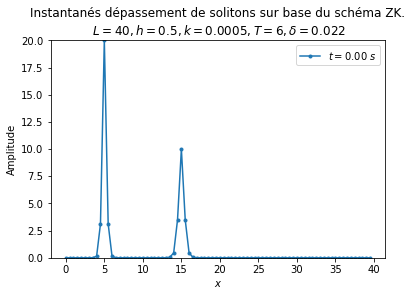

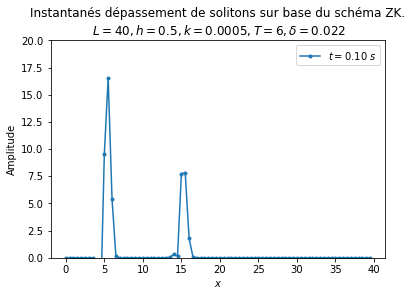

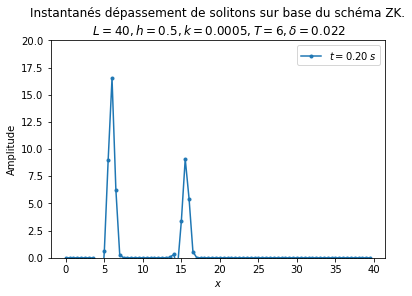

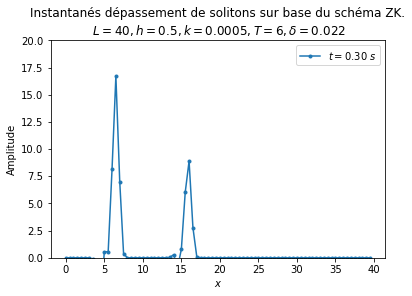

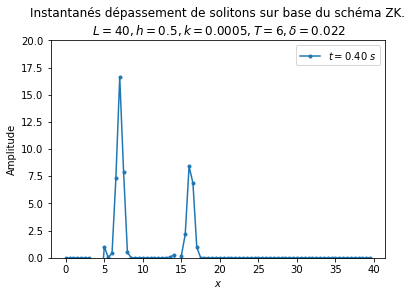

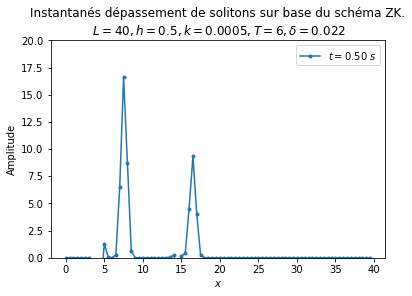

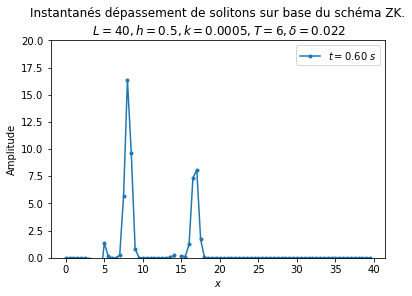

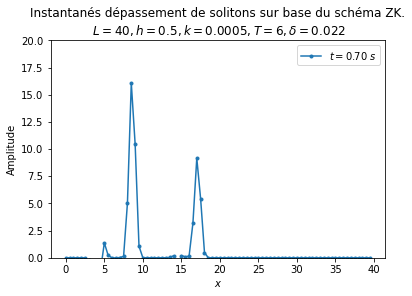

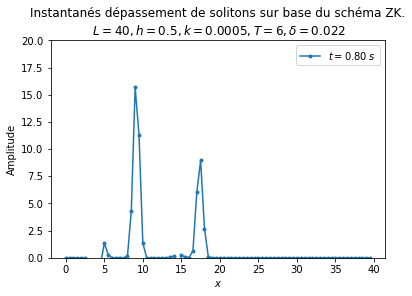

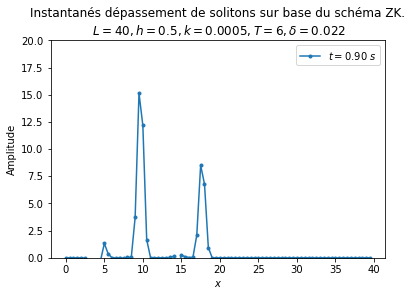

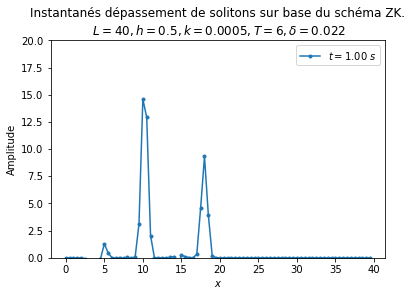

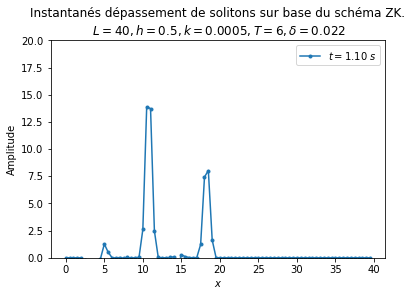

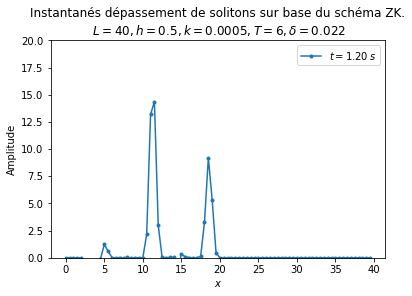

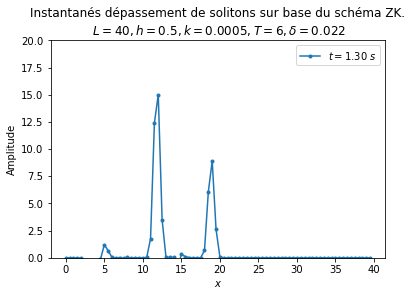

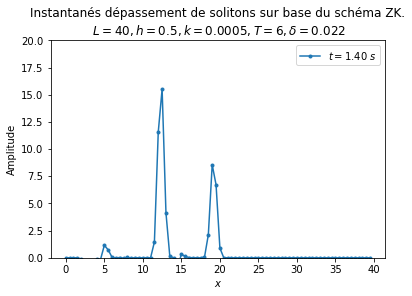

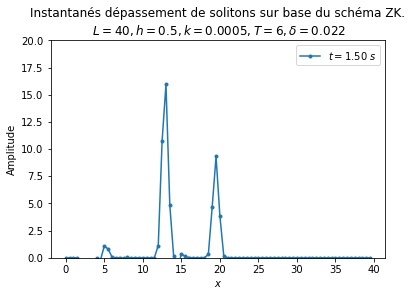

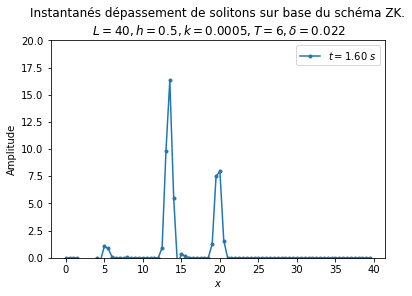

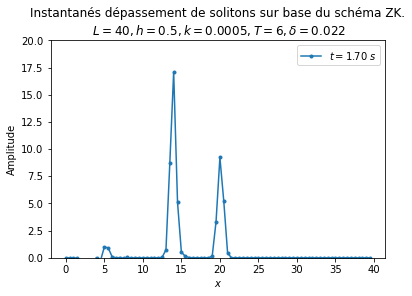

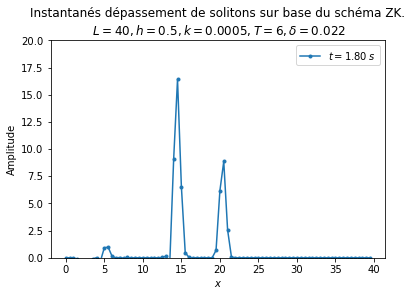

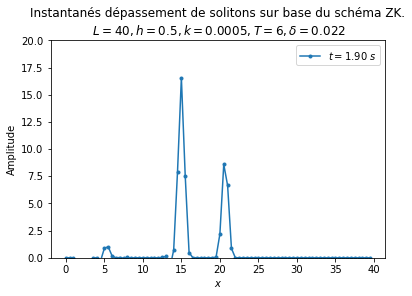

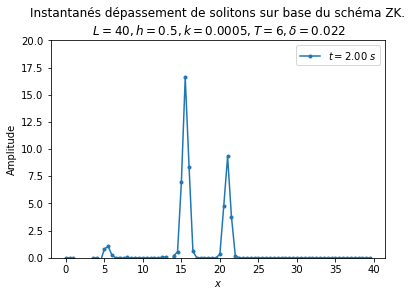

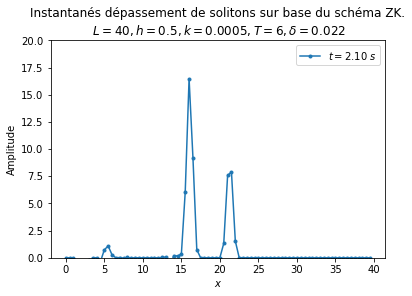

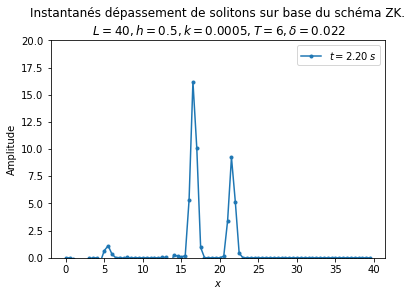

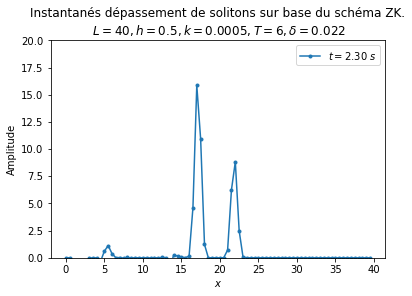

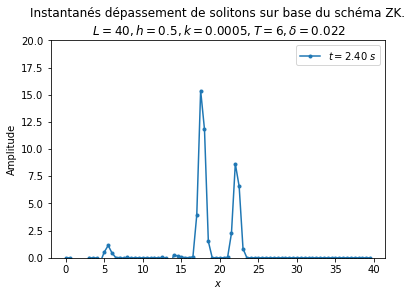

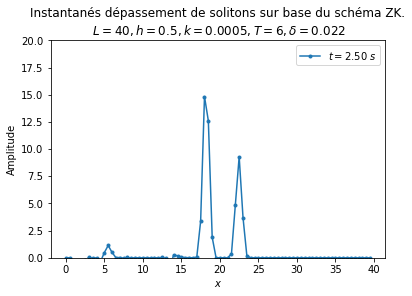

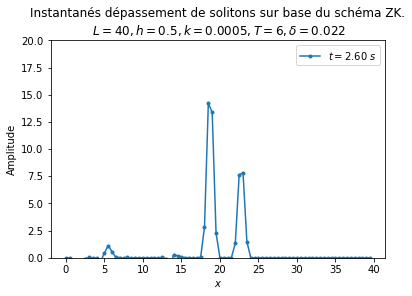

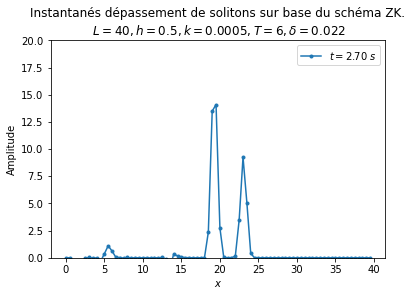

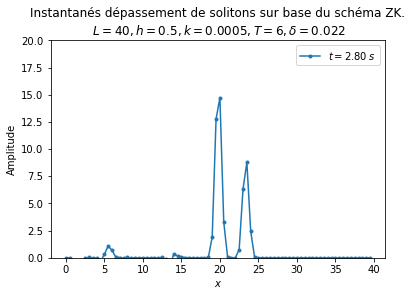

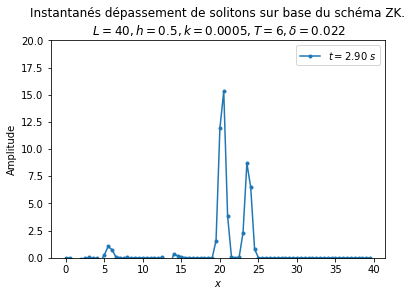

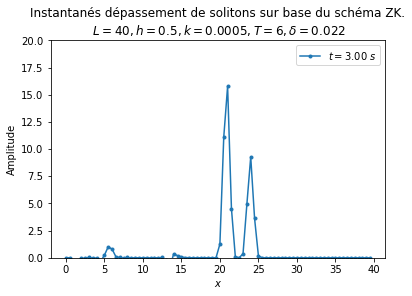

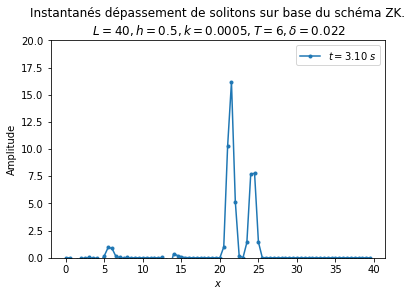

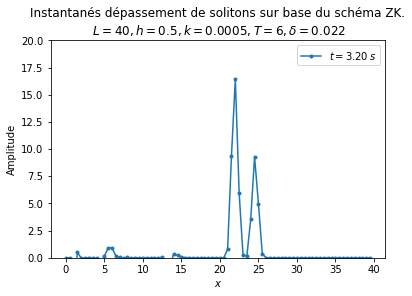

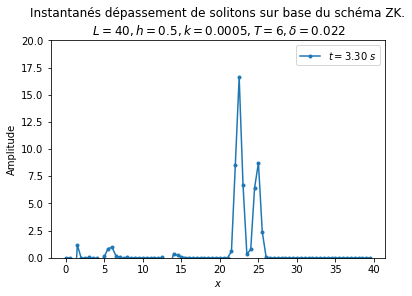

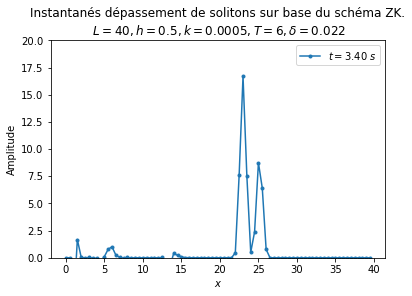

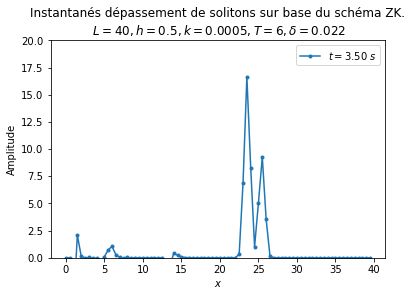

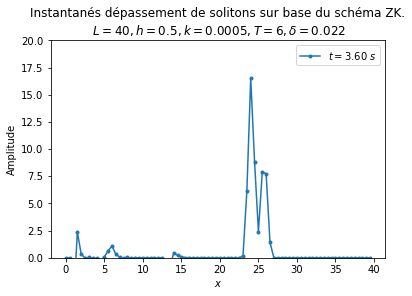

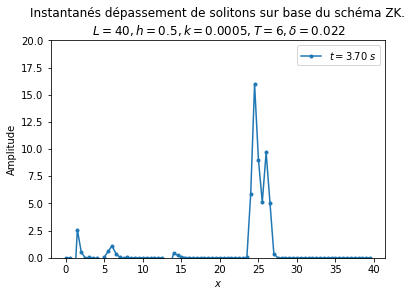

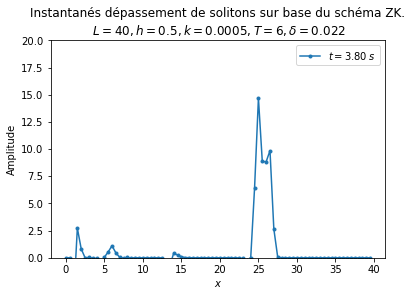

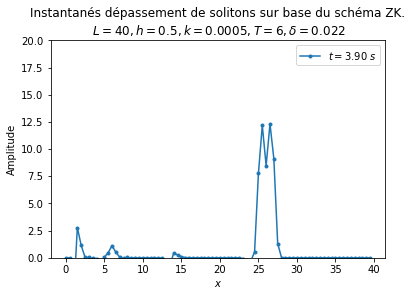

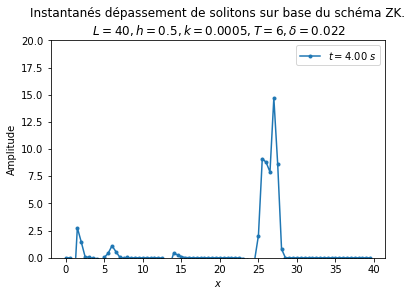

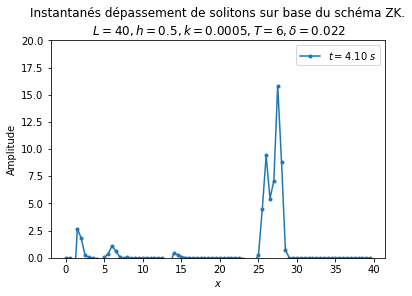

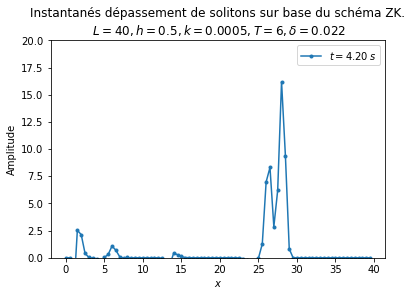

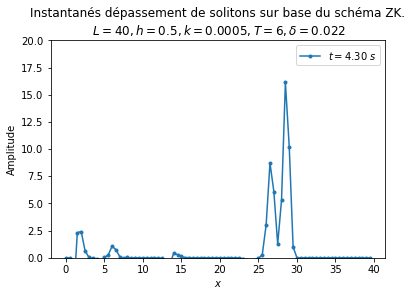

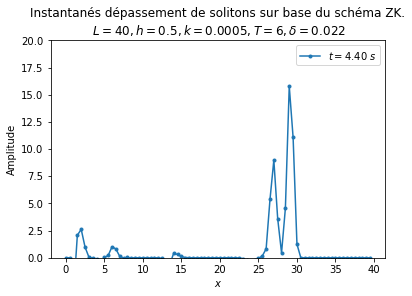

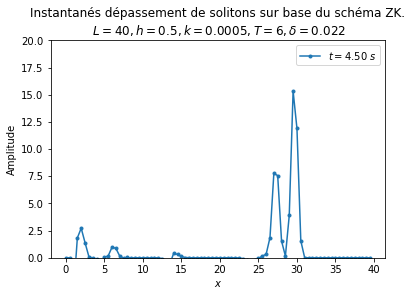

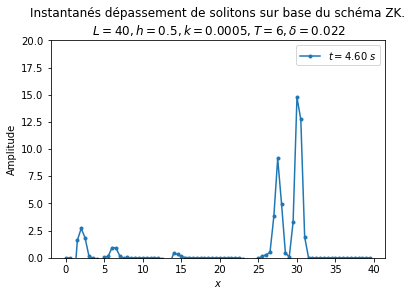

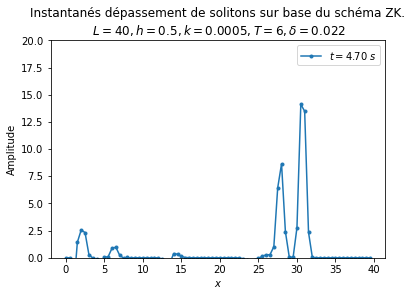

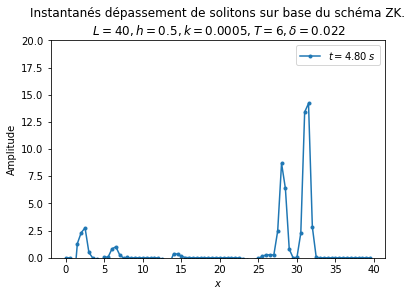

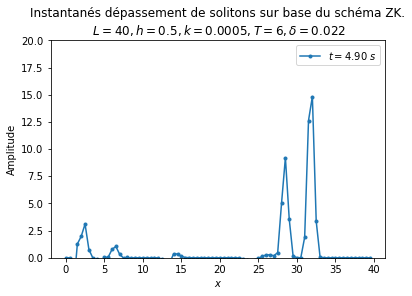

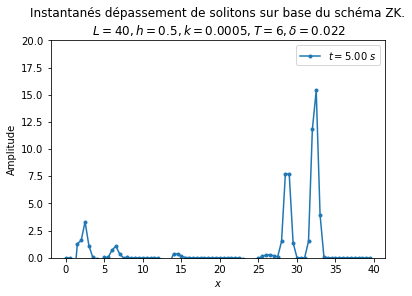

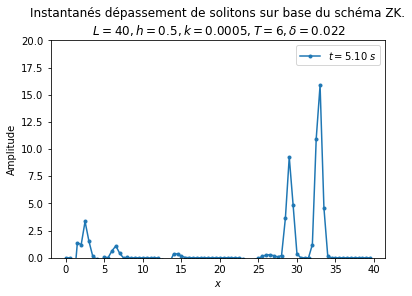

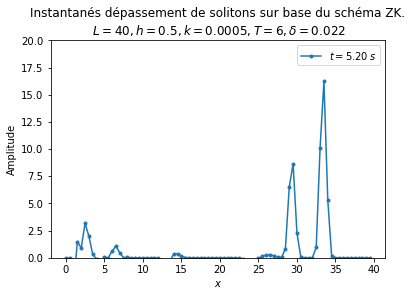

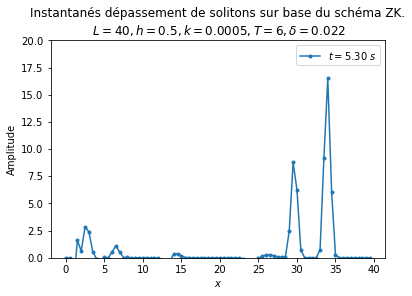

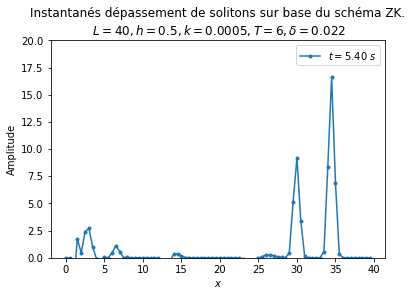

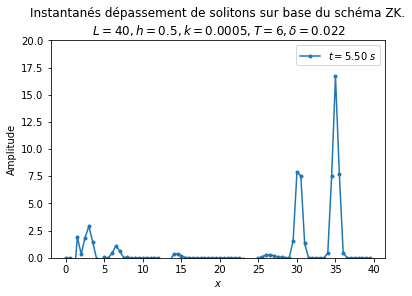

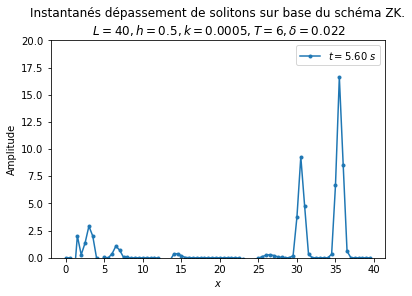

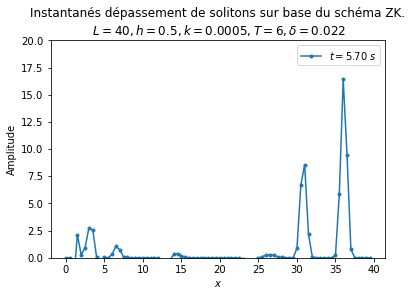

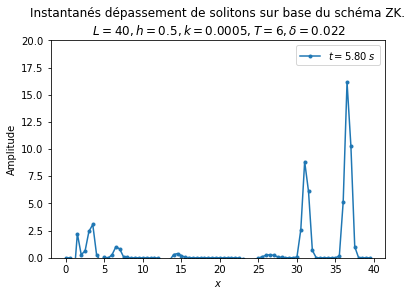

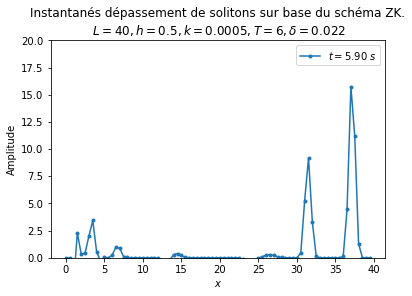

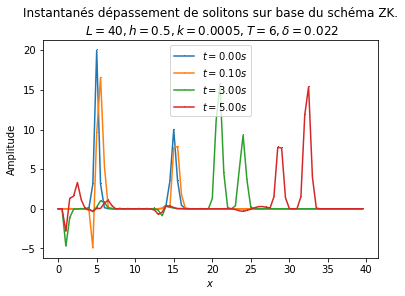

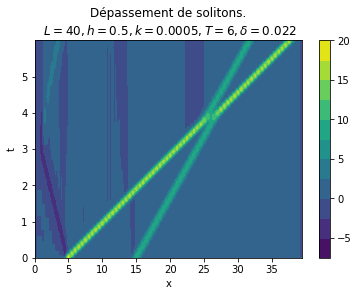

<Figure size 432x288 with 0 Axes>

In [4]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, pi ,exp
from scipy.stats import hypsecant
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import cm


def onde1(x):
    """Fonction de condition initiale gaussienne"""
    return (1/sqrt(2*np.pi*0.01)) * exp(-50*(x-1)**2)

def onde2(x):
    return (1/sqrt(2*np.pi*0.4)) * exp(-1.25*(x-5)**2)

def u0(x):
    """Fonction de condition initiale comme superposition deux ondes"""
    return onde1(x) + onde2(x)
    
def soliton1(x,c,a):
    """Fonction de condition initiale comme solution analytique d'un soliton."""
    return 0.5*c*(pi*hypsecant.pdf((x-a)*sqrt(c)/2))**2

def soliton2(x,c,a):
    return 0.5*c*(pi*hypsecant.pdf((x-a)*sqrt(c)/2))**2

def solit(c1,a1,c2,a2):
    """Fonction de condition initiale comme superposition deux solitons"""
    def sol_(x):
        return soliton1(x,c1,a1) + soliton2(x,c2,a2)
    return sol_


delta = 0.022

def time_ev(u_0, t_f, k, x_f, h):
    """Résolution numérique de l'équation de KdV sur base du schéma de Zabusky-Krustal"""
    x_0 = 0
    L = x_f- x_0
    N = L/h
    t_0 = 0
    T = t_f - t_0
    M = T/k
    x_range = [i*h for i in range(int(x_f/h))]
    U = []
    U.append([u_0(x) for x in x_range])


    t_range = [j*k for j in range(int(t_f/k))]
    for t in t_range[1:]:
        u1 = U[-1]

        if t == k:
            u2 = u1
        else:
            u2 = U[-2]

        U.append([0,0] + [u2[i] - (k/(3*h)) *(u1[i+1] + u1[i] + u1[i-1]) * (u1[i+1] - u1[i-1]) - (delta**2) * (k/(h**3)) * (u1[i+2] - 2*u1[i+1] + 2*u1[i-1] - u1[i-2])  for i in range(2,len(u1)-2)] + [0,0])

    print("Résolution numérique avec une grille spatiale de {} points".format(N))
    print("Résolution numérique avec une grille temporelle de {} points".format(M))
    print("Paramètres numérique : L = {}, T = {}s, h = {}, k = {}, delta = {}".format(L, T, h, k, delta))

    #Plot semi-animé d'Instantanés
    t_span = np.arange(0,8,0.1)
    n = np.zeros(np.shape(t_span)[0])
    for t in t_span:
        n = [int(t/k)]
        if n[0] < len(U):
            plt.plot(x_range, U[n[0]], label = "$t={:2.2f}\; s$".format(t), marker ='.')
            plt.title('Instantanés dépassement de solitons sur base du schéma ZK.\n $L = {}, h = {}, k = {}, T = {}, \delta = {}$'.format(x_f, h, k, t_f, delta))
            plt.xlabel('$x$')
            plt.ylabel('Amplitude')
            plt.ylim([0,20])
            plt.legend()
            plt.show(block=False)
            plt.pause(0.05)
            plt.clf()
    plt.close()
    #Plot d'Instantanés
    t_span = [0, 0.1, 3, 5]
    n = np.zeros(np.shape(t_span)[0])
    n = [int(t_span[i]/k) for i in range(np.shape(t_span)[0])]
    for i in range(np.shape(t_span)[0]):
        plt.plot(x_range, U[n[i]], label="$t = {:2.2f}s$".format(t_span[i]), marker=',')
    plt.title('Instantanés dépassement de solitons sur base du schéma ZK.\n $L = {}, h = {}, k = {}, T = {}, \delta = {}$'.format(x_f, h, k, t_f, delta))
    plt.xlabel('$x$')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    """
    #Animation 2D
    x_data = x_range
    y_data = U
    U0 = [u_0(x) for x in x_range]
    #class matplotlib.animation.FuncAnimation(fig, func,
    #frames = None, init_func=None, fargs=None, save_count = None, *, cache_frame_data = True, **kwargs)


    x_0 = 0
    fig, ax = plt.subplots()
    ax.set_xlim(x_0,x_f)
    ax.set_ylim(-5,20)
    line, = ax.plot(U0)

    def animation_frame(i):
        x_data.append(i)
        y_data.append(i)
        line.set_xdata(x_data)
        line.set_ydata(y_data)
        return line,

    animation = FuncAnimation(fig, func=animation_frame, frames = np.arange(0, 10, 0.01), interval = 1)
    plt.show()
    """
    #Plot du Meshgrid
    [xx,tt]=np.meshgrid(x_range,t_range)
    plt.contourf(xx,tt, np.array(U), levels = 10)
    plt.title('Dépassement de solitons.\n $L = {}, h = {}, k = {}, T = {}, \delta = {}$'.format(x_f, h, k, t_f, delta))
    plt.xlabel("x")
    plt.ylabel("t")
    plt.colorbar()
    plt.show()
    plt.clf()

if __name__ == "__main__":
    time_ev(solit(20,15,40,5), 6, 0.0005, 40, 0.5)
